# Week 4: The density matrix and optical Bloch equations


This notebook is to accompany the _Week 4_ content for the atomic physics component of KYA323: Atomic and nuclear physics at the University of Tasmania.

**Version**: 1.0  
**Created**: 02/07/2024 (AJM)  
**Updated**: 06/08/2024 (AJM)

## Import packages

To streamline operations in Python, packages can be imported to perform a host of various tasks. To make this process as simple as possible, most of the required packages for the course are included in the file [`Atomic.py`](https://github.com/Andy-UTAS/Solid-state/blob/master/SSP.py). For this section, we also make use of the [`OBE_Python_Tools`](https://github.com/LucyDownes/OBE_Python_Tools) package to aid with solving the optical Bloch equations.

As usual, we begin by importing all of the content required for our calculations:

In [1]:
from Atomic import *
import OBE_Tools as OBE

Atomic.py - the package for atomic physics content for use in KYA323 has been loaded. 

Core package versions are as follows:
Matplotlib 3.7.1
NumPy 1.25.0


Time evolution demands that we make animations, so we are going to import some goodies to make animations work in `jupyter`, which can sometimes be a bit fiddly to get working. 

In [2]:
# Animation specific imports
from IPython.display import HTML # IPython for rendering in-line animations
plt.rcParams["animation.html"] = "jshtml"

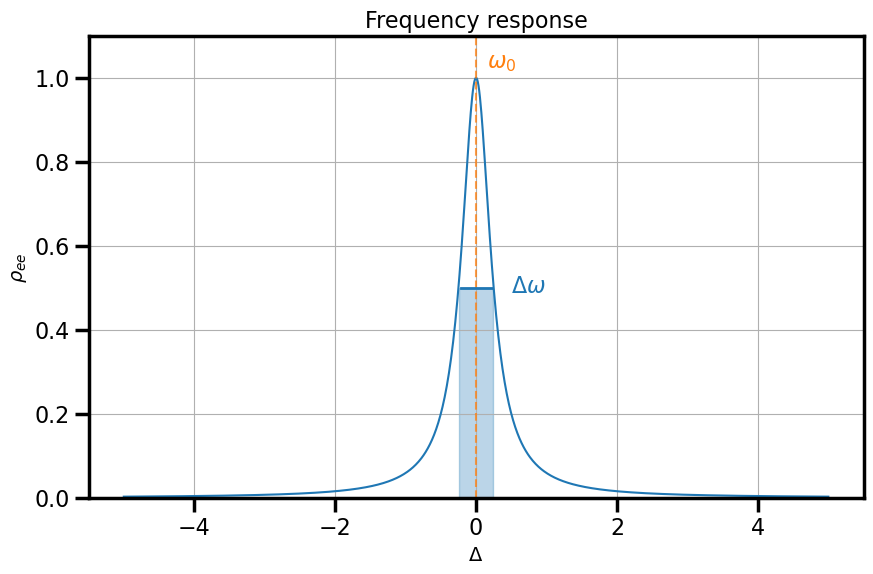

In [90]:
from matplotlib.patches import FancyArrowPatch

# Define the Lorentzian function
def lorentzian(Delta, Delta_0, gamma):
    return (gamma / 2)**2 / ((Delta - Delta_0)**2 + (gamma / 2)**2)

# Parameters
Delta_0 = 0  # Position of the peak (center of the plot)
gamma = 0.5  # Width of the Lorentzian (narrow peak)
Delta_range = np.linspace(-5, 5, 1000)  # Range of detuning values

# Calculate the Lorentzian line shape
rho_ee = lorentzian(Delta_range, Delta_0, gamma)

# Plotting the Lorentzian line shape
plt.figure(figsize=(10, 6))
plt.plot(Delta_range, rho_ee, label=r'$\rho_{ee}$')
plt.axvline(x=Delta_0, color='C1', linestyle='--', alpha=0.75)  # Vertical line at the peak position
plt.text(Delta_0 + 0.15, 1.025, r'$\omega_0$', color='C1', fontsize=16)  # Label for the peak


plt.axhline(0.5, 0.48, 0.52, color='C0', linewidth = 2)  # Vertical line at the peak position

plt.text(Delta_0 + 0.75, 0.49, r'$\Delta\omega$', color='C0', fontsize=16, ha='center')
plt.fill_between(Delta_range, 0, 0.5, where=(Delta_range >= Delta_0 - gamma / 2) & (Delta_range <= Delta_0 + gamma / 2), 
                 color='C0', alpha=0.3)

# Axis labels
plt.xlabel(r'$\Delta$', fontsize=14)
plt.ylabel(r'$\rho_{ee}$', fontsize=14)
plt.ylim(0, 1.1)

# Title and grid
plt.title('Frequency response', fontsize=16)
plt.grid(True)

if savefigflag: # Change to True to save the figures
    plt.savefig('Images/05-01_01-resonance.svg', bbox_inches= 'tight')

# Show plot
plt.show()


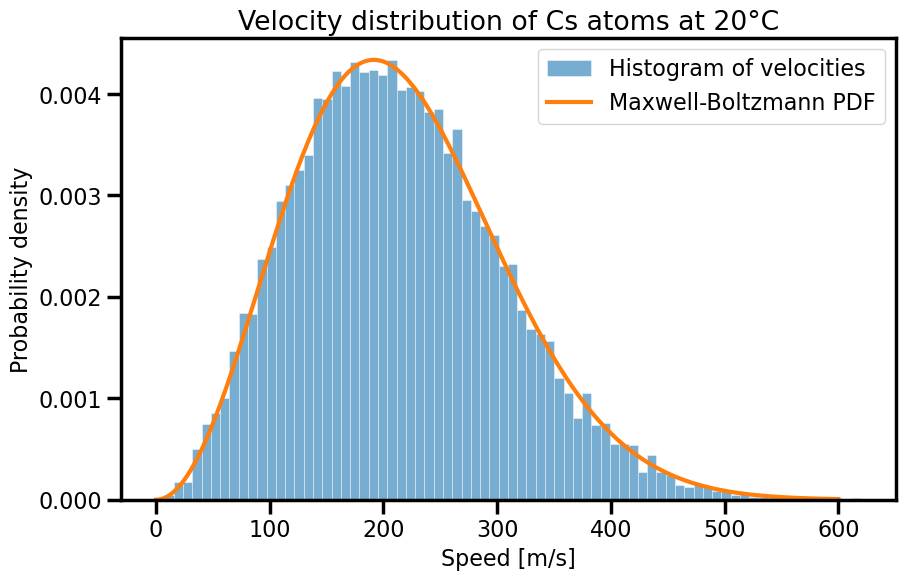

In [110]:
# Constants and Parameters
mCs = 132.90545 * 1.66053906660e-27  # Caesium mass in kg (from atomic mass units)
beamtemp = 293  # Temperature in Kelvin

# Mean velocity calculation from Maxwell-Boltzmann distribution
def vmean(T):
    return np.sqrt((8 * kb * T) / (np.pi * mCs))

# Generate velocities using Maxwell-Boltzmann distribution
n_atoms = 10000
MDvelocities = maxwell.rvs(scale=np.sqrt(kb * beamtemp / mCs), size=n_atoms)

# Plot the velocity distribution
plt.figure(figsize=(10, 6))
plt.hist(MDvelocities, bins=75, density=True, edgecolor='w', linewidth=.5, alpha=0.6, label="Histogram of velocities")
v_values = np.linspace(0, 600, 1000)
plt.plot(v_values, maxwell.pdf(v_values, scale=np.sqrt(kb * beamtemp / mCs)), color = 'C1', lw=3, label="Maxwell-Boltzmann PDF")
plt.xlabel('Speed [m/s]')
plt.ylabel('Probability density')
plt.title('Velocity distribution of Cs atoms at 20°C')
plt.legend()

if savefigflag: # Change to True to save the figures
    plt.savefig('Images/05-01_02-resonance.svg', bbox_inches= 'tight')
    
plt.show()

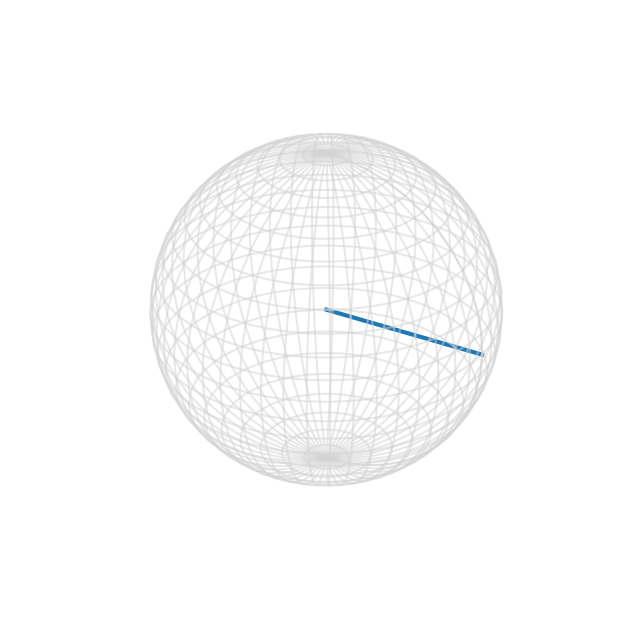

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters for the precession
omega = 2 * np.pi  # Precession frequency (rad/s) for one full revolution
t_max = 1          # Total time for one full revolution
frames = 120       # Number of frames in the animation

# Function to generate Bloch vector components
def bloch_vector(t):
    x = np.cos(omega * t)
    y = np.sin(omega * t)
    z = 0  # Precession around the equator (z=0)
    return np.array([x, y, z])

# Set up the figure and 3D axis
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Set up the Bloch sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x = np.sin(v) * np.cos(u)
y = np.sin(v) * np.sin(u)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="lightgray", alpha=0.5)

# Set the axis limits
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Ensure the aspect ratio is equal
ax.set_box_aspect([1, 1, 1])

# Hide axes
ax.set_axis_off()

# Create the initial vector
vector_line, = ax.plot([], [], [], color='C0', linewidth=3)

# Initialize function for the animation
def init():
    vector_line.set_data([], [])
    vector_line.set_3d_properties([])
    return vector_line,

# Animation function to update the vector
def update(frame):
    t = t_max * frame / (frames - 1)  # Ensure the last frame matches the first
    vector = bloch_vector(t)
    vector_line.set_data([0, vector[0]], [0, vector[1]])
    vector_line.set_3d_properties([0, vector[2]])
    return vector_line,

# Create the animation
ani = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True)

# Save the animation as a GIF with 60 fps
ani.save('Images/05-01_03-precessionr.gif', 
         writer=PillowWriter(fps=20, metadata={'duration': 1000/60}))

plt.show()


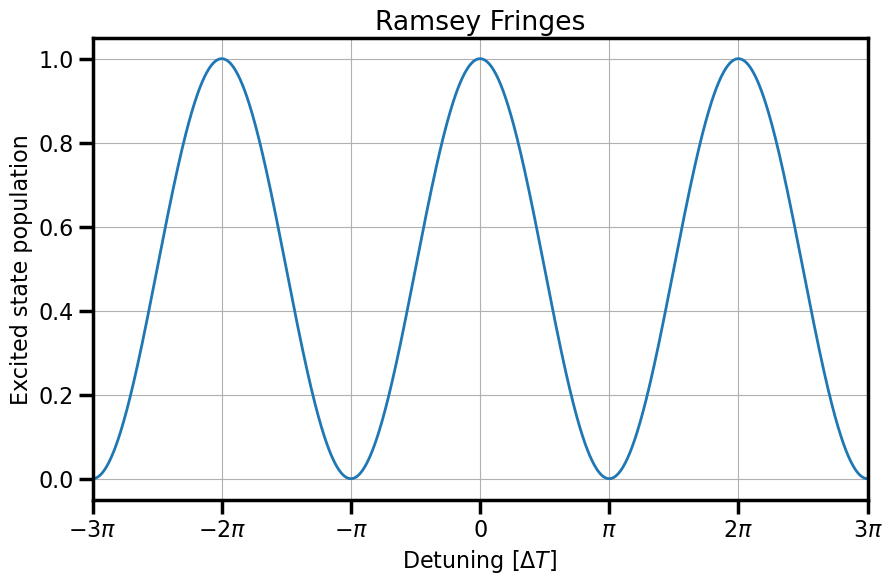

In [162]:
def ramsey_simp(detla_T):
    return 1/2 * (1+np.cos(detla_T))

# Parameters
L = .1
l = .1
T_new = np.pi / 2 * (L / l)
tau_new = np.pi / 2

# Define the detuning range
Delta_T_range = np.linspace(-3*pi, 3*pi, 1000)

# Calculate the excitation probability
P_values = ramsey_simp(Delta_T_range)

# Plotting the ensemble signal
plt.figure(figsize=(10, 6))
plt.plot(Delta_T_range, P_values, lw = 2)

# Set x-axis ticks at multiples of pi
plt.xlim(-3*pi, 3*pi)
plt.xticks(ticks=np.arange(-3*pi, 4*pi, pi), 
           labels=[r"$-3\pi$", r"$-2\pi$", r"$-\pi$", r"$0$", r"$\pi$", r"$2\pi$", r"$3\pi$"])

plt.xlabel(r'Detuning [$\Delta T$]')
plt.ylabel('Excited state population')
plt.title('Ramsey Fringes')
plt.grid(True)


if savefigflag: # Change to True to save the figures
    plt.savefig('Images/05-01_04-ramsey.svg', bbox_inches= 'tight')

plt.show()

## Ramsey fringes for a general detuning

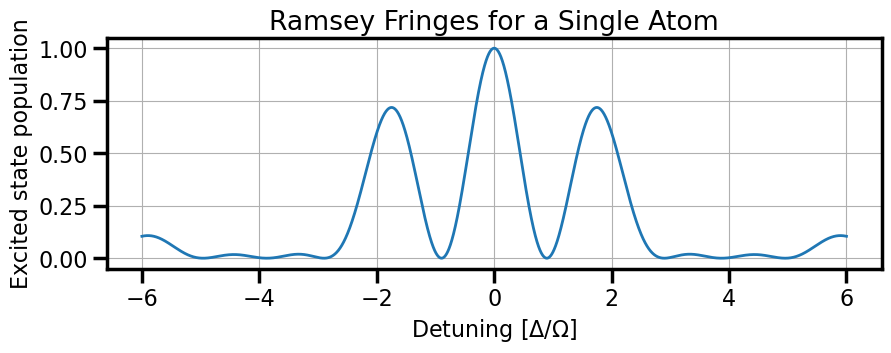

In [176]:
# Define the probability for excitation
def P(Delta, T, tau):
    term1 = (4 / (1 + Delta**2)) * (np.sin(np.sqrt(1 + Delta**2) * tau / 2))**2
    cos_term = np.cos((Delta * T) / 2) * np.cos(np.sqrt(1 + Delta**2) * tau / 2)
    sin_term = (Delta / np.sqrt(1 + Delta**2)) * np.sin((Delta * T) / 2) * np.sin(np.sqrt(1 + Delta**2) * tau / 2)
    term2 = (cos_term - sin_term)**2
    return term1 * term2

# Parameters
L = 0.1
l = 0.1
T_new = np.pi / 2 * (L / l)
tau_new = np.pi / 2

# Define the detuning range
Delta_range = np.linspace(-6, 6, 10000)

# Calculate the excitation probability
P_values = P(Delta_range, T_new, tau_new)

# Plotting
plt.figure(figsize=(10, 3))
plt.plot(Delta_range, P_values, lw = 2)
plt.xlabel(r'Detuning [$\Delta/\Omega$]')
plt.ylabel('Excited state population')
plt.title('Ramsey Fringes for a Single Atom')
plt.grid(True)

if savefigflag: # Change to True to save the figures
    plt.savefig('Images/05-01_05-full-ramsey.svg', bbox_inches= 'tight')

plt.show()

### Plot of precession at different rates

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters for the precession
omega = 2 * np.pi  # Precession frequency (rad/s) for one full revolution
t_max = 1          # Total time for one full revolution
frames = 120       # Number of frames in the animation

# Function to generate Bloch vector components
def bloch_vector(t):
    x = np.cos(omega * t)
    y = np.sin(omega * t)
    z = 0  # Precession around the equator (z=0)
    return np.array([x, y, z])

# Set up the figure and 3D axis
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Set up the Bloch sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x = np.sin(v) * np.cos(u)
y = np.sin(v) * np.sin(u)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="lightgray", alpha=0.5)

# Set the axis limits
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Ensure the aspect ratio is equal
ax.set_box_aspect([1, 1, 1])

# Hide axes
ax.set_axis_off()

# Create the initial vector
vector_line, = ax.plot([], [], [], color='C0', linewidth=3)

# Initialize function for the animation
def init():
    vector_line.set_data([], [])
    vector_line.set_3d_properties([])
    return vector_line,

# Animation function to update the vector
def update(frame):
    t = t_max * frame / (frames - 1)  # Ensure the last frame matches the first
    vector = bloch_vector(t)
    vector_line.set_data([0, vector[0]], [0, vector[1]])
    vector_line.set_3d_properties([0, vector[2]])
    return vector_line,

# Create the animation
ani = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True)

# Save the animation as a GIF with 60 fps
ani.save('Images/05-02_01-precessionr.gif', 
         writer=PillowWriter(fps=20, metadata={'duration': 1000/60}))

plt.show()


### Free-induction decay

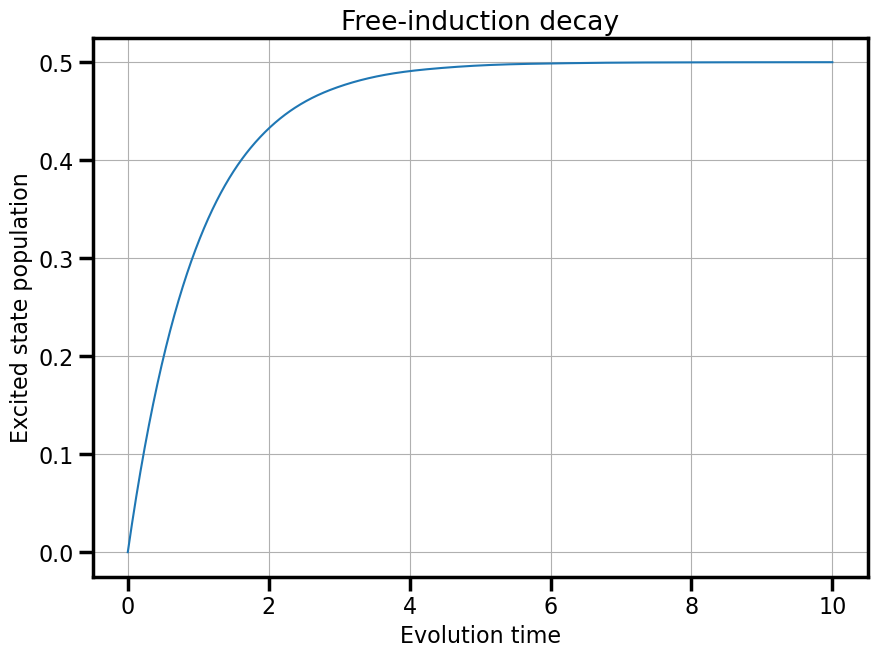

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
gamma = 1.0   # Decay rate (gamma)
omega = 1.0   # Rabi frequency (omega)

# Optical Bloch Equations
def bloch_equations(t, y, omega, gamma):
    rabi_oscillation = omega * y[2]            # Omega * Re(rho_12)
    decay = -gamma * (y[0] - 0.5)              # Decay term for excited state population
    coherence_decay = -gamma * y[1:] / 2       # Decay of coherence terms (rho_12)
    
    return [rabi_oscillation + decay, coherence_decay[0], coherence_decay[1]]

# Initial conditions: [excited state population (rho_22), Re(rho_12), Im(rho_12)]
y0 = [0.0, 0.5, 0.0]  # Start in the ground state with some initial coherence

# Time array
t = np.linspace(0, 10, 1000)

# Solve the Bloch equations
solution = solve_ivp(bloch_equations, [t[0], t[-1]], y0, t_eval=t, args=(omega, gamma))

# Extract the excited state population
excited_state_population = solution.y[0]

# Plotting the excited state population over time
plt.plot(t, excited_state_population, label='Excited State Population')
plt.xlabel('Evolution time')
plt.ylabel('Excited state population')
plt.title('Free-induction decay')
plt.grid(True)

if savefigflag: # Change to True to save the figures
    plt.savefig('Images/05-02_02-free-induction.svg', bbox_inches= 'tight')

plt.show()


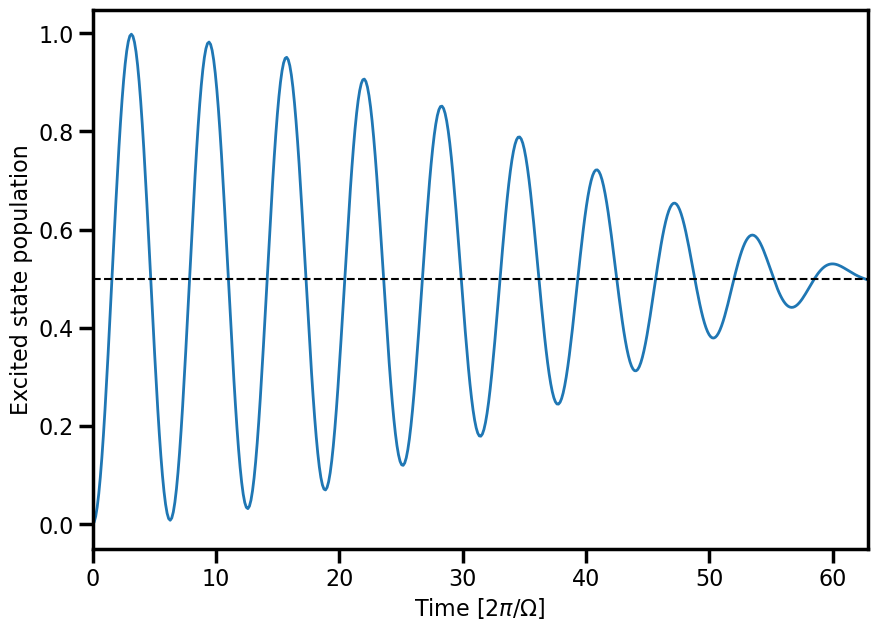

In [24]:
Omegas = np.random.uniform(0.95, 1.05, size=1000)
times = np.linspace(0,20*pi,500) # Time [units of 1/Rabi frequency]

# Define the excited state population
def rho_22(Omega, Delta, time):
    """
    Calculate the theoretical excited state distribution from the optical Bloch equations
    
    Parameters:
    Omega (float): Rabi frequency
    Delta (float): Detuning
    time (array): Time
    
    Returns:
    array: excited state population
    """
    
    Omega_gen = np.sqrt(Omega ** 2 + Delta ** 2) # Generalised Rabi frequency
    return ((Omega/Omega_gen) ** 2) * (np.sin(Omega_gen * time / 2)) ** 2

rho_22_t = np.zeros(len(times))
for Omega in Omegas:
    rho_22_t += rho_22(Omega, 0, times)
    
rho_22_t = rho_22_t/len(Omegas)

# Make the figure
plt.figure()
plt.plot(times, rho_22_t, linewidth = 2)
plt.hlines(0.5, times.min(), times.max(), linestyle = '--', color = 'k')
plt.xlabel('Time [$2\pi/\Omega$]')
plt.ylabel('Excited state population')

plt.xlim(times.min(), times.max())

# Save the figure                     
if savefigflag: # Change to True to save the figures
    plt.savefig('Images/05-02_03-Rabi.svg', bbox_inches= 'tight')

plt.show()

### Enegy-level splitting for magnetic resonance

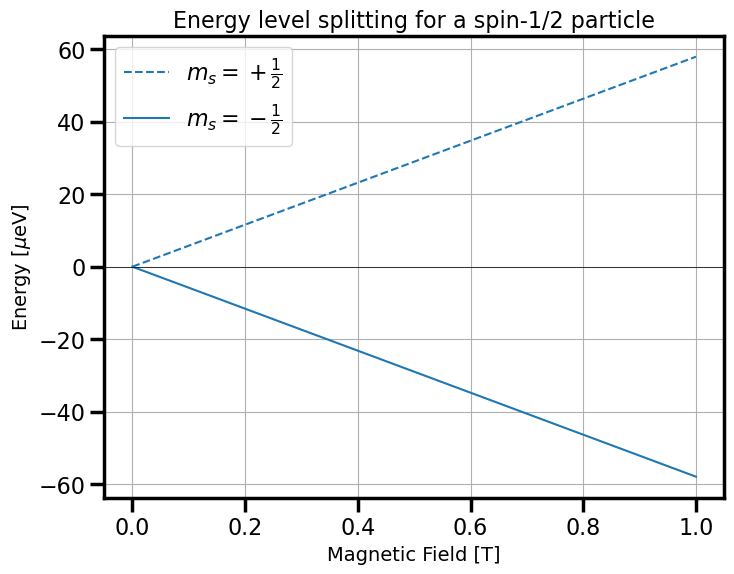

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
mu_B = 9.274009994e-24  # Bohr magneton in J/T
hbar = 1.0545718e-34    # Reduced Planck's constant in J.s
g = 2                   # g-factor for a free electron
show_en = False

# Magnetic field range
B = np.linspace(0, 1, 500)  # Magnetic field in Tesla

# Energy level splitting for spin +1/2 and -1/2
E_plus_half = g * mu_B * B * (+0.5)
E_minus_half = g * mu_B * B * (-0.5)

# Plotting the energy level splitting
plt.figure(figsize=(8, 6))
plt.plot(B, E_plus_half/(e*1e-6), label=r"$m_s = +\frac{1}{2}$", color='C0', linestyle='--')
plt.plot(B, E_minus_half/(e*1e-6), label=r"$m_s = -\frac{1}{2}$", color='C0')
plt.axhline(0, color='black', linewidth=0.5)

outputfile = 'Images/05-02_05-magnetic-splitting'

if show_en:
    # Draw a vertical line at a specific magnetic field (e.g., B = 1 T)
    B_line = .5
    plt.vlines(B_line, E_minus_half[int(len(B)/2)]/(e*1e-6), E_plus_half[int(len(B)/2)]/(e*1e-6), color='k')
    plt.text(B_line+0.025, 2.5, r'$\Delta E=\gamma\hbar B_0$', fontsize=16, color='k')
    outputfile = outputfile + '-w-energy'

# Labels and title
plt.xlabel("Magnetic Field [T]", fontsize=14)
plt.ylabel("Energy [$\mu$eV]", fontsize=14)
plt.title("Energy level splitting for a spin-1/2 particle", fontsize=16)
plt.legend()
plt.grid(True)

# Save the figure                     
if savefigflag: # Change to True to save the figures
    plt.savefig(outputfile + '.svg', bbox_inches= 'tight')

# Show the plot
plt.show()


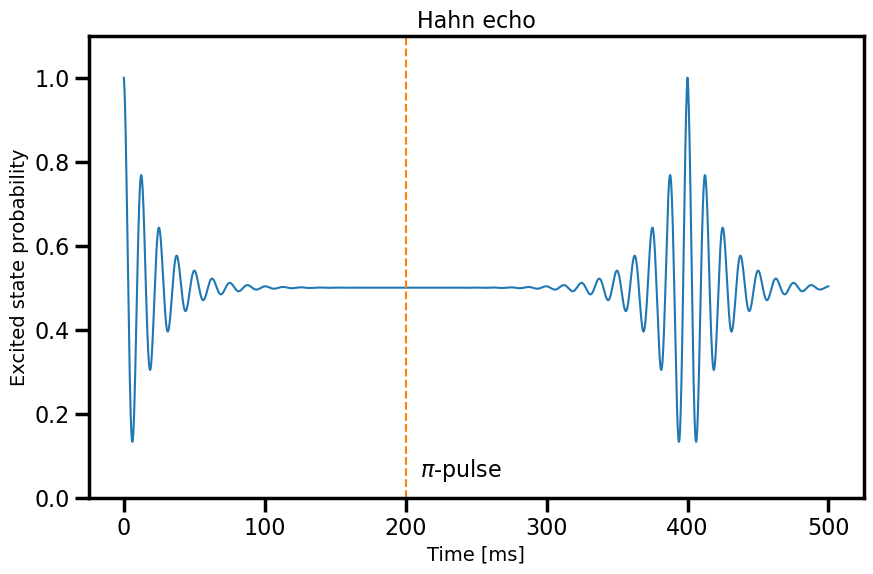

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T2 = 20  # Spin-spin relaxation time (ms)
omega = 0.5  # Oscillation frequency (rad/ms)
t_max = 500  # Total time for simulation (ms)
dt = 0.1  # Time step (ms)
t = np.arange(0, t_max, dt)  # Time array

# Spin echo sequence parameters
tau = 200  # Time between 90° and 180° pulses (ms)
echo_center = 2 * tau  # Echo occurs at 2 * tau

# Excited state probability before the 180° pulse
P_exc = 0.5 * (1 + np.exp(-t / T2) * np.cos(omega * t))

# Simulate the spin echo signal
P_exc_echo = np.zeros_like(t)
for i in range(len(t)):
    if t[i] <= tau:
        # Before the 180° pulse, just the initial evolution
        P_exc_echo[i] = P_exc[i]
    elif t[i] <= echo_center:
        # After the 180° pulse but before the echo, the evolution time reverses
        P_exc_echo[i] = P_exc[int(2 * tau / dt) - i]
    else:
        # After the echo, normal dephasing continues
        P_exc_echo[i] = P_exc[i - int(echo_center / dt)]

# Plotting the excited state probability
plt.figure(figsize=(10, 6))
plt.plot(t, P_exc_echo, label='Excited State Probability', color='C0')
plt.axvline(tau, color='C1', linestyle='--', label=r'$\tau$ ($\pi$-pulse)')
plt.text(tau+10, 0.05, r'$\pi$-pulse', fontsize=16, color='k')
plt.ylim(0, 1.1)

# Labels and title
plt.xlabel("Time [ms]", fontsize=14)
plt.ylabel("Excited state probability", fontsize=14)
plt.title("Hahn echo", fontsize=16)

# plt.grid(True)

# Save the figure                     
if savefigflag: # Change to True to save the figures
    plt.savefig('Images/05-03_06-Echo.svg', bbox_inches= 'tight')

# Show the plot
plt.show()


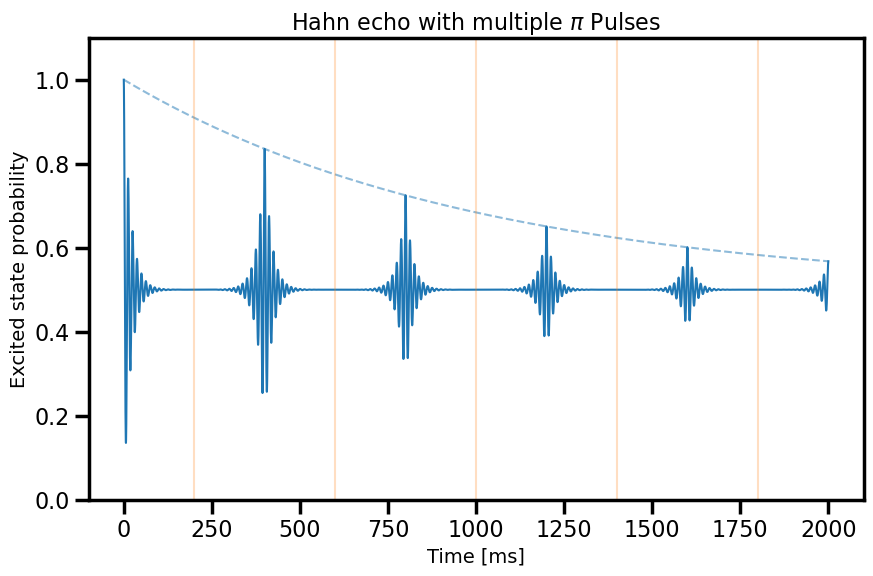

In [163]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T2 = 20  # Spin-spin relaxation time (ms)
T2_star = 1000  # Inhomogeneous dephasing time (ms) or T2*
omega = 0.5  # Oscillation frequency (rad/ms)
t_max = 2000  # Total time for simulation (ms)
dt = 0.1  # Time step (ms)
t = np.arange(0, t_max, dt)  # Time array

# Spin echo sequence parameters
tau = 200  # Time between 90° and first 180° pulse (ms)
num_pulses = 5  # Number of 180° pulses to include at odd intervals

# Function to simulate the evolution of the excited state probability with T2 and T2*
def excited_state_probability(t, T2, omega, T2_star=None):
    if T2_star:
        return 0.5 * (1 + np.exp(-t / T2) * np.cos(omega * t) * np.exp(-t / T2_star))
    else:
        return 0.5 * (1 + np.exp(-t / T2) * np.cos(omega * t))

# Initialize the excited state probability
P_exc_echo = excited_state_probability(t, T2, omega)

# Apply the π pulses and simulate echoes with T2* decay
for i in range(num_pulses):
    pulse_time = (2 * i + 1) * tau  # Apply π pulse at odd intervals
    echo_time = (2 * i + 2) * tau  # Echo occurs at even intervals

    # Calculate the indices for the pulse and echo
    pulse_idx = int(pulse_time / dt)
    echo_idx = int(echo_time / dt)

    # Apply phase reversal and rephasing, and account for T2* decay
    if pulse_idx < echo_idx and echo_idx <= len(t):
        # Rephase and apply T2* decay
        P_exc_echo[pulse_idx:echo_idx] = 0.5 * (
            1 + np.exp(-(t[:echo_idx - pulse_idx]) / T2) * np.cos(omega * (t[:echo_idx - pulse_idx])) * np.exp(-(t[pulse_idx:echo_idx] - t[pulse_idx]) / T2_star)
        )[::-1]

    # After the echo, the system continues evolving normally with T2* decay
    if echo_idx < len(t):
        P_exc_echo[echo_idx:] = 0.5 * (
            1 + np.exp(-(t[echo_idx:] - t[echo_idx]) / T2) * np.cos(omega * (t[echo_idx:] - echo_time)) * np.exp(-(t[echo_idx:] - t[echo_idx]) / T2_star)
        )

decay_factor = np.exp(-t / T2_star)    
P_exc_echo = ((P_exc_echo - 1/2) * decay_factor) + 1/2        

# Plotting the excited state probability with multiple echoes and T2* decay
plt.figure(figsize=(10, 6))
plt.plot(t, P_exc_echo, label='Excited State Probability', color='C0')
plt.plot(t, 0.5 + decay_factor/2, label='Excited State Probability', color='C0', linestyle = '--', alpha = 0.5)



for i in range(num_pulses):
    pulse_time = (2 * i + 1) * tau
    echo_time = (2 * i + 2) * tau
    plt.axvline(pulse_time, color='C1', label=r'$\pi$-pulse at $t={}$ ms'.format(pulse_time), alpha = 0.25)

# Plot limits and labels
plt.ylim(0, 1.1)
plt.xlabel("Time [ms]", fontsize=14)
plt.ylabel("Excited state probability", fontsize=14)
plt.title("Hahn echo with multiple $\pi$ Pulses", fontsize=16)


# Save the figure                     
if savefigflag: # Change to True to save the figures
    plt.savefig('Images/05-03_07-multi-Echo.svg', bbox_inches= 'tight')

# Show the plot
plt.show()


### The NIST-7 clock

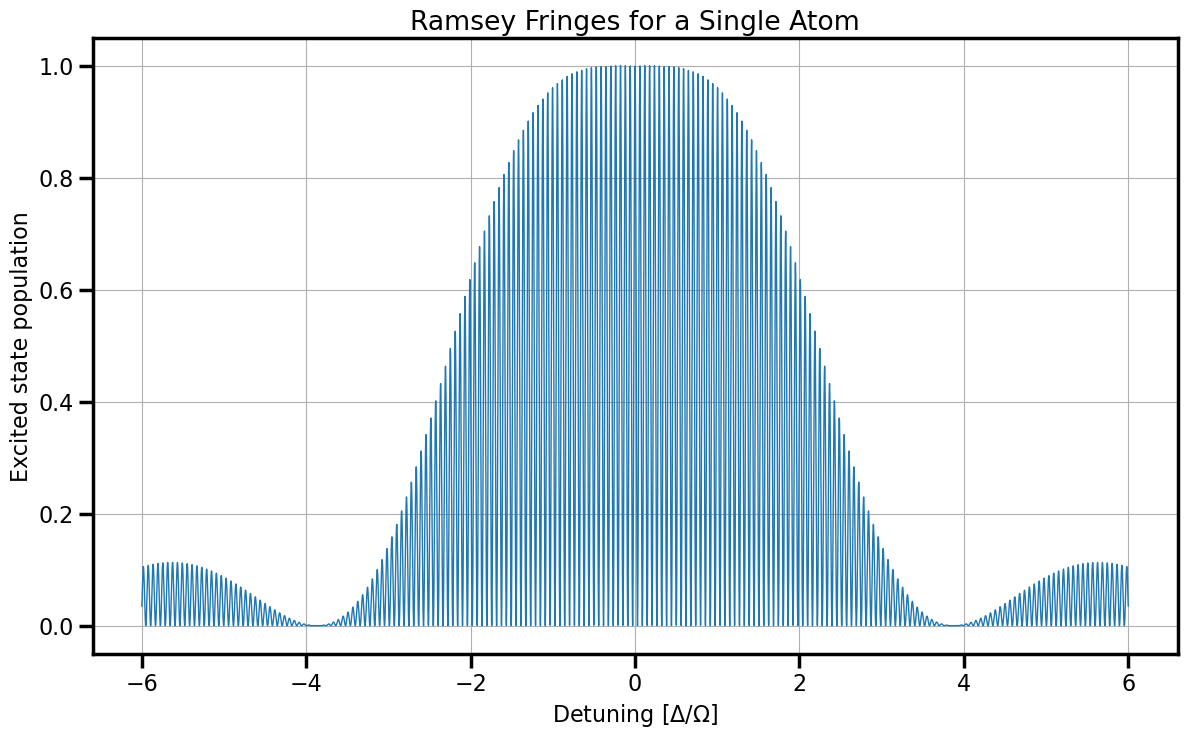

In [177]:
# Parameters
L = 1.53
l = 0.023
T_new = np.pi / 2 * (L / l)
tau_new = np.pi / 2

# Define the detuning range
Delta_range = np.linspace(-6, 6, 10000)

# Calculate the excitation probability
P_values = P(Delta_range, T_new, tau_new)

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(Delta_range, P_values, lw = 1)
plt.xlabel(r'Detuning [$\Delta/\Omega$]')
plt.ylabel('Excited state population')
plt.title('Ramsey Fringes for a Single Atom')
plt.grid(True)

if savefigflag: # Change to True to save the figures
    plt.savefig('Images/05-01_06-NIST-7-ramsey.svg', bbox_inches= 'tight')

plt.show()

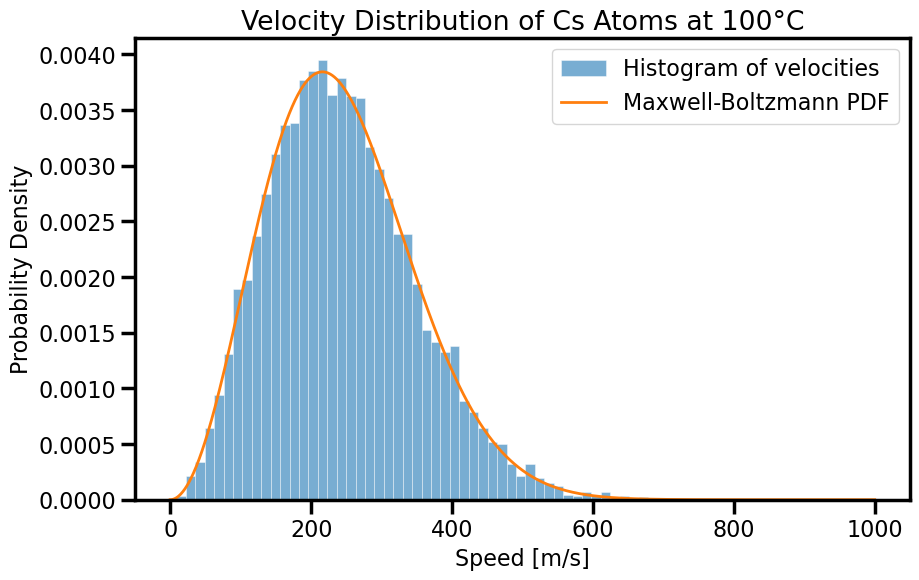

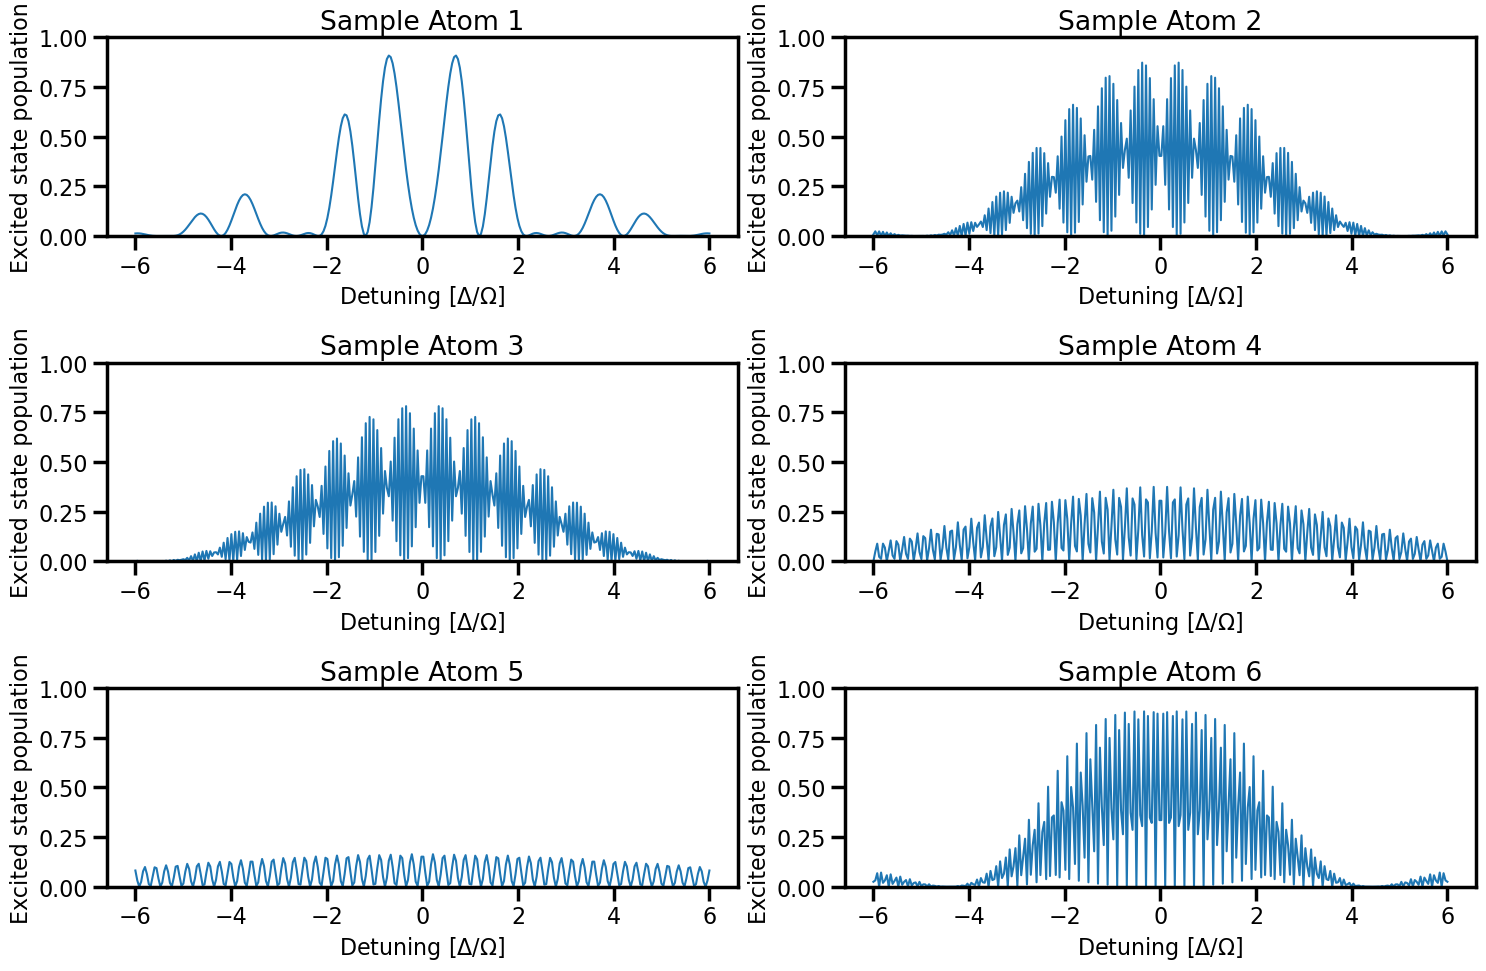

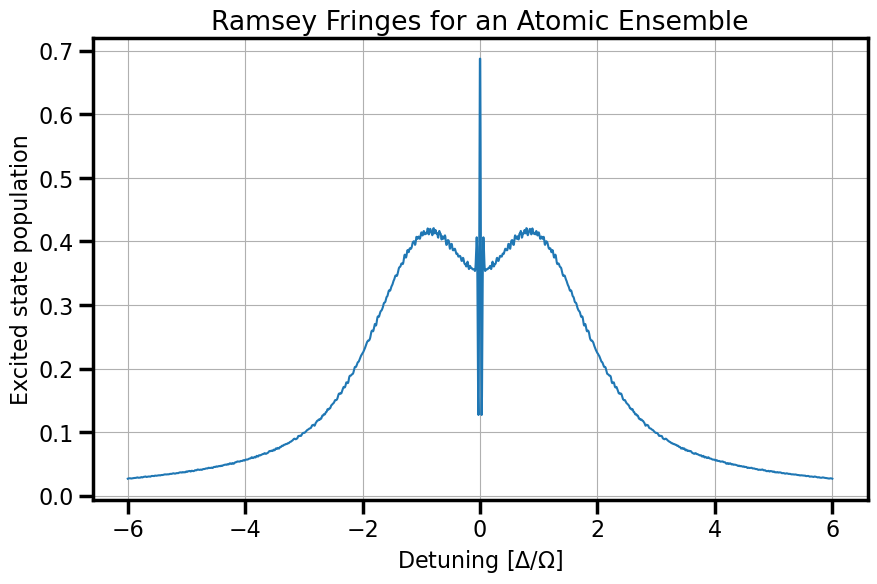

In [178]:
from scipy.stats import maxwell

# Constants and Parameters
mCs = 132.90545 * 1.66053906660e-27  # Caesium mass in kg (from atomic mass units)
beamtemp = 373  # Temperature in Kelvin
L = 1.53  # Length in meters
l = 0.023  # Interaction zone length in meters

# Mean velocity calculation from Maxwell-Boltzmann distribution
def vmean(T):
    return np.sqrt((8 * kb * T) / (np.pi * mCs))

# Generate velocities using Maxwell-Boltzmann distribution
n_atoms = 10000
MDvelocities = maxwell.rvs(scale=np.sqrt(kb * beamtemp / mCs), size=n_atoms)

# Plot the velocity distribution
plt.figure(figsize=(10, 6))
plt.hist(MDvelocities, bins=50, density=True, edgecolor='w', linewidth=.5, alpha=0.6, label="Histogram of velocities")
v_values = np.linspace(0, 1000, 1000)
plt.plot(v_values, maxwell.pdf(v_values, scale=np.sqrt(kb * beamtemp / mCs)), 'C1', lw=2, label="Maxwell-Boltzmann PDF")
plt.xlabel('Speed [m/s]')
plt.ylabel('Probability Density')
plt.title('Velocity Distribution of Cs Atoms at 100°C')
plt.legend()


if savefigflag: # Change to True to save the figures
    plt.savefig('Images/05-01_07-NIST-7-velocity-dist.svg', bbox_inches= 'tight')

plt.show()

# Define the probability for excitation function for a given velocity
def P(Delta, T_new, tau_new):
    term1 = (4 / (1 + Delta**2)) * (np.sin(np.sqrt(1 + Delta**2) * tau_new / 2))**2
    cos_term = np.cos((Delta * T_new) / 2) * np.cos(np.sqrt(1 + Delta**2) * tau_new / 2)
    sin_term = (Delta / np.sqrt(1 + Delta**2)) * np.sin((Delta * T_new) / 2) * np.sin(np.sqrt(1 + Delta**2) * tau_new / 2)
    term2 = (cos_term - sin_term)**2
    return term1 * term2

# Sample velocities and calculate probabilities
samplev = MDvelocities[:6]
sampleprobs = [P(np.linspace(-6, 6, 300), np.pi / 2 * v / vmean(beamtemp) * L / l, np.pi / 2 * v / vmean(beamtemp)) for v in samplev]

# Plotting the Ramsey fringes for the sample velocities
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()
for i, prob in enumerate(sampleprobs):
    axes[i].plot(np.linspace(-6, 6, 300), prob)
    axes[i].set_ylim(0, 1)
    axes[i].set_xlabel(r'Detuning [$\Delta/\Omega$]')
    axes[i].set_ylabel('Excited state population')
    axes[i].set_title(f'Sample Atom {i+1}')

plt.tight_layout()

if savefigflag: # Change to True to save the figures
    plt.savefig('Images/05-01_08-NIST-7-ramsey-individual.svg', bbox_inches= 'tight')

plt.show()

# Calculate the ensemble signal by summing over all atoms
probs = np.array([P(np.linspace(-6, 6, 2000), np.pi / 2 * v / vmean(beamtemp) * L / l, np.pi / 2 * v / vmean(beamtemp)) for v in MDvelocities])
signal = np.mean(probs, axis=0)

# Plotting the ensemble signal
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(-6, 6, 2000), signal)
plt.xlabel(r'Detuning [$\Delta/\Omega$]')
plt.ylabel('Excited state population')
plt.title('Ramsey Fringes for an Atomic Ensemble')
plt.grid(True)


if savefigflag: # Change to True to save the figures
    plt.savefig('Images/05-01_09-NIST-7-ramsey-ensemble.svg', bbox_inches= 'tight')

plt.show()

